<a href="https://colab.research.google.com/github/gokul-3/survival_rate_prediction/blob/main/Covid19_Country_Dietary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle  
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_fat=pd.read_csv('Fat_Supply_Quantity_Data.csv',sep=',',  decimal=',')
data_kcal=pd.read_csv('Food_Supply_kcal_Data.csv',sep=',',  decimal=',')
data_kg=pd.read_csv('Food_Supply_Quantity_kg_Data.csv',sep=',',  decimal=',')
data_protein=pd.read_csv("Protein_Supply_Quantity_Data.csv",sep=',',  decimal=',')

In [ ]:
data_fat.set_index(data_fat["Country"],drop=True, inplace=True)
data_fat = data_fat.drop(["Country"],axis=1)
data_kcal.set_index(data_kcal["Country"],drop=True, inplace=True)
data_kcal = data_kcal.drop(["Country"],axis=1)
data_kg.set_index(data_kg["Country"],drop=True, inplace=True)
data_kg = data_kg.drop(["Country"],axis=1)
data_protein.set_index(data_protein["Country"],drop=True, inplace=True)
data_protein = data_protein.drop(["Country"],axis=1)

In [ ]:
columnas_a_borrar=["Unit (all except Population)","Population"]
data_fat.drop(columnas_a_borrar, inplace=True, axis=1)
data_kcal.drop(columnas_a_borrar, inplace=True, axis=1)
data_kg.drop(columnas_a_borrar, inplace=True, axis=1)
data_protein.drop(columnas_a_borrar, inplace=True, axis=1)
#data_protein.isna().sum()

In [ ]:
classes = data_fat[["Active","Recovered","Deaths","Confirmed"]].astype(float)
classes["Deaths"]=classes["Deaths"]/classes["Confirmed"]
classes["Recovered"]=classes["Recovered"]/classes["Confirmed"]

In [ ]:
data_fat.drop(["Active","Recovered","Deaths","Confirmed"],inplace=True, axis=1)
data_kcal.drop(["Active","Recovered","Deaths","Confirmed"],inplace=True, axis=1)
data_kg.drop(["Active","Recovered","Deaths","Confirmed"],inplace=True, axis=1)
data_protein.drop(["Active","Recovered","Deaths","Confirmed"],inplace=True, axis=1)
data_fat["Obesity"].fillna(value=-1, inplace=True)
data_fat["Undernourished"].fillna(value=-1, inplace=True)
data_kcal["Obesity"].fillna(value=-1, inplace=True)
data_kcal["Undernourished"].fillna(value=-1, inplace=True)
data_kg["Obesity"].fillna(value=-1, inplace=True)
data_kg["Undernourished"].fillna(value=-1, inplace=True)
data_protein["Obesity"].fillna(value=-1, inplace=True)
data_protein["Undernourished"].fillna(value=-1, inplace=True)

In [ ]:
classes.to_csv("classes.csv",sep=',')
data_fat =data_fat.add_prefix("FAT-")
data_kcal = data_kcal.add_prefix("KCAL-")
data_kg = data_kg.add_prefix("KG-")
data_protein = data_protein.add_prefix("PROTEIN-")
data_kg

,KG-Alcoholic Beverages,KG-Animal fats,KG-Animal Products,"KG-Aquatic Products, Other",KG-Cereals - Excluding Beer,KG-Eggs,"KG-Fish, Seafood",KG-Fruits - Excluding Wine,KG-Meat,KG-Milk - Excluding Butter,KG-Miscellaneous,KG-Offals,KG-Oilcrops,KG-Pulses,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished
Country,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0014,0.1973,9.4341,0,24.8097,0.2099,0.035,5.3495,1.202,7.5828,0.0728,0.2057,0.07,0.2953,0.0574,0.8802,0.3078,1.3489,0,0.077,0.5345,6.7642,40.5645,4.5,29.8
Albania,1.6719,0.1357,18.7684,0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.238,8e-04,1.8096,0.1055,1.5367,0,0.1515,0.3261,11.7753,31.2304,22.3,6.2
Algeria,0.2711,0.0282,9.6334,0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.087,0.3493,0.4783,0.0557,4.134,0.2216,1.8342,0,0.1152,1.031,11.6484,40.3651,26.6,3.9
Angola,5.8087,0.056,4.9278,0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.155,0.4186,0.6507,9e-04,18.1102,0.0508,1.8495,0,0.0061,0.6463,2.3041,45.0722,6.8,25
Antigua and Barbuda,3.5764,0.0087,16.6613,0,5.996,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.184,0.1524,1.4522,0.1564,3.8749,0,0.0253,0.8102,5.4495,33.3233,19.1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0,12.9253,0.3389,0.9456,7.646,3.8328,9.392,0.0702,0.2078,0.0281,0.3342,9e-04,2.5643,0.1479,3.4106,0,9e-04,1.3734,4.1474,35.2416,25.2,21.2
Vietnam,1.4591,0.164,8.5765,0.0042,16.874,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.841,0.2032,0.2074,1.0596,0.288,1.2846,0.815,0.307,0.2201,11.9508,41.4232,2.1,9.3
Yemen,0.0364,0.0446,5.7874,0,27.2077,0.2579,0.524,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0,0.0017,1.0811,3.2135,44.2126,14.1,38.9


In [ ]:
dataset = pd.concat([data_fat,data_kcal,data_kg,data_protein],axis=1)
dataset.replace("<2.5","1", inplace=True)
dataset.to_csv("dataset.csv",sep=',')
dataset = pd.read_csv("dataset.csv",sep=',',index_col="Country").astype(float)

In [ ]:
Normalizador_MinMaxScaler = MinMaxScaler().fit(dataset)
data_norm = Normalizador_MinMaxScaler.transform(dataset)
data_norm=pd.DataFrame(data_norm)
data_norm.columns = dataset.columns
data_norm.to_csv("data_norm.csv",sep=',')

In [ ]:
pca = PCA(n_components= 0.95, svd_solver="full")
dataset_pca = pd.DataFrame(pca.fit_transform(data_norm), index=dataset.index)
kmeans = KMeans(n_clusters=20, random_state=0).fit(dataset_pca)
clusters = kmeans.predict(dataset_pca)
dataset["cluster"] = clusters
dataset

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Offals,KG-Oilcrops,KG-Pulses,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,cluster
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,...,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,17
Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,...,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,10
Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,...,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,4
Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25.0,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,...,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,25.0,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25.0,7
Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0000,0.0,0.2020,22.2995,14.4436,0.2469,19.1,-1.0,2.3041,1

Text(0, 0.5, 'Davies-Bouldin')

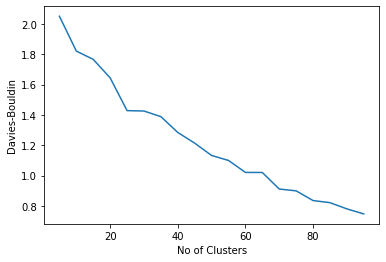

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(dataset_pca,clusters)
pp=[]
for i in range(5,100,5):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(dataset_pca)
  clusters = kmeans.predict(dataset_pca)
  dataset["cluster"] = clusters
  pp.append(davies_bouldin_score(dataset_pca,clusters))
plt.plot(range(5,100,5),pp)
plt.xlabel('No of Clusters')
plt.ylabel('Davies-Bouldin')

In [ ]:
pd.DataFrame(pp, index=range(5,100,5))
kmeans = KMeans(n_clusters=20, random_state=0).fit(dataset_pca)
clusters = kmeans.predict(dataset_pca)
dataset["cluster"] = clusters
dataset_with_classes = pd.concat([dataset,classes],axis=1).astype(float)
dataset_grouped = dataset_with_classes.groupby("cluster")
dataset_grouped["Deaths"].describe()["count"].describe()
pd.DataFrame(dataset_grouped["Deaths"].describe()["75%"])
statistics_death = dataset_grouped["Deaths"].describe()
statistics_death[statistics_death["75%"]>0.07]
statistics_death = dataset_grouped["Deaths"].describe()
statistics_death[(statistics_death["75%"]<0.04)]
centroides_clusters = dataset_grouped.mean()
centroides_clusters

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,Active,Recovered,Deaths,Confirmed
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.00000,12.185300,3.307600,0.000000,7.166400,0.436100,0.156300,0.551300,2.706900,0.008200,5.413900,0.156300,0.452500,0.551300,1.143700,0.197500,0.246800,0.189200,0.000000,0.501900,37.814700,26.213600,0.600600,3.800000,8.700000,0.139500,3.767000,0.627800,0.000000,30.711500,0.139500,0.087200,1.447500,0.872000,1.935800,0.017400,0.104600,0.122100,1.988100,0.906900,...,0.419500,6.052100,0.031900,0.547000,3.067700,0.097800,0.820900,9.277000,44.557600,3.800000,8.700000,0.040700,8.587700,0.027100,0.000000,28.055900,0.393400,0.569800,0.610500,3.140700,3.764800,0.691900,0.162800,5.094300,1.132800,2.455600,0.101800,0.081400,0.006800,0.156000,41.405500,0.006800,3.486600,0.027100,3.800000,8.700000,0.006531,0.985306,0.007487,0.906141
1.0,0.00000,14.752480,1.767960,0.000720,2.950360,0.228320,1.977280,0.625400,9.391680,0.066600,1.228180,0.158660,19.664520,0.028620,0.053980,0.353020,0.262800,0.000000,0.000000,0.190140,35.246520,10.932080,0.120700,27.720000,6.020000,0.733480,7.536220,0.646720,0.006720,15.864180,0.114180,1.561120,4.439760,4.229600,0.837500,0.188540,0.148400,7.766200,0.156500,0.061660,...,0.026560,8.638600,0.044900,2.285520,0.025680,0.043440,0.516780,2.495380,42.198660,27.720000,6.020000,0.198420,23.057240,0.068820,0.026820,15.152080,0.356320,8.779200,2.012640,11.315860,1.645620,0.864580,4.173660,0.461300,0.070600,3.390300,0.161580,0.001260,0.001160,0.077000,26.941220,0.009080,1.003080,0.232040,27.720000,6.020000,0.039100,0.931749,0.004880,0.289545
2.0,0.00000,32.836840,7.804310,0.000000,2.684440,1.191630,0.693070,0.340110,13.192550,0.057020,9.780890,0.172750,0.724420,0.027380,0.100750,0.055170,2.144490,0.000000,0.000000,0.766430,17.164690,10.010370,0.252650,23.710000,2.430000,2.793450,17.372690,2.809380,0.000000,14.877290,0.661490,0.748890,1.704440,6.535910,6.364900,0.211350,0.246940,0.325660,0.202980,0.100190,...,0.039110,2.820230,0.401310,3.486570,0.000000,0.081550,0.424970,5.562050,28.519190,23.710000,2.430000,0.463000,30.997890,0.318220,0.000470,13.008850,1.574460,3.319720,0.584530,12.595880,12.153670,1.033630,0.350790,0.404750,0.104670,1.095150,0.989240,0.000000,0.007480,0.255690,19.001770,0.028180,1.511500,0.200380,23.710000,2.430000,0.414244,0.860435,0.012664,4.597737
3.0,0.00000,27.008925,4.565137,0.000000,2.935400,0.862300,1.390613,0.517713,14.821375,0.247063,5.231250,0.138200,2.786825,0.101938,0.212637,0.060862,1.013362,0.000000,0.000000,0.496825,22.991988,14

In [ ]:
dataset_with_classes_deaths=dataset_with_classes.copy()
dataset_with_classes_deaths["cluster"] = dataset_with_classes_deaths["cluster"].map({0:"Normal",1:"Low",2:"Low",3:"High",4:"High",5:"Normal",6:"Normal",7:"Low",8:"Normal",9:"Normal",10:"Normal",11:"Low",12:"Low",13:"Normal",14:"Normal",15:"Low",16:"Normal",17:"High",18:"Low",19:"Low",20:"Normal"})
dataset_with_classes_deaths["cluster"] = dataset_with_classes_deaths["cluster"].map({"Low":"Normal","High":"High","Normal":"Normal"})
dataset_grouped_death = dataset_with_classes_deaths.groupby("cluster")
centroides_death=dataset_grouped_death.mean()
centroides_death

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,Active,Recovered,Deaths,Confirmed
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,0.000000,18.465980,3.206473,0.000000,6.890123,0.657960,0.703840,0.516787,8.749277,0.087857,4.962800,0.187217,3.532260,0.429743,0.358703,0.153923,0.42070,0.003057,0.000000,1.008530,31.534800,17.801627,0.328373,16.360000,11.220000,0.815653,7.668390,0.824510,0.000000,24.484457,0.271077,0.545063,1.736540,3.395163,2.479127,0.270157,0.145920,1.106547,1.567917,0.192440,...,0.103267,3.830970,0.191737,2.654673,0.109997,0.149330,0.815180,7.085313,39.912397,16.360000,11.220000,0.176140,17.717037,0.073383,0.001113,22.538940,0.731807,2.657110,0.718010,8.753987,4.720503,0.779677,1.293963,3.504190,0.236953,1.046217,0.371303,0.00673,0.002080,0.308980,32.284157,0.021463,1.775027,0.28123,16.360000,11.220000,0.190936,0.788328,0.020764,1.004347
Normal,0.001256,21.173514,4.338160,0.000546,3.837924,1.017304,0.881851,0.547545,9.653923,0.049889,5.140403,0.140694,3.283689,0.224879,0.264654,0.244212,0.69231,0.004334,0.001709,0.632617,28.826453,18.736664,0.305470,18.788571,10.148571,1.434385,9.643016,1.362329,0.003384,19.482694,0.462239,0.650023,2.070996,4.003768,3.019896,0.135576,0.140213,1.102880,1.010524,0.181222,...,0.088385,5.657742,0.204134,2.830067,0.092814,0.110647,0.859348,5.871755,37.365356,18.788571,10.148571,0.281381,21.985391,0.115696,0.010956,18.271926,1.253538,3.505501,0.867244,10.149173,6.178443,0.772098,1.385480,2.474384,0.230699,1.893631,0.456218,0.00351,0.010724,0.229648,28.014746,0.020664,1.728387,0.16055,18.788571,10.148571,0.607085,0.785856,0.021034,2.231483


In [ ]:
dataset_grouped_death["Deaths"].describe()
plt.rcParams["figure.figsize"] = (20,10)

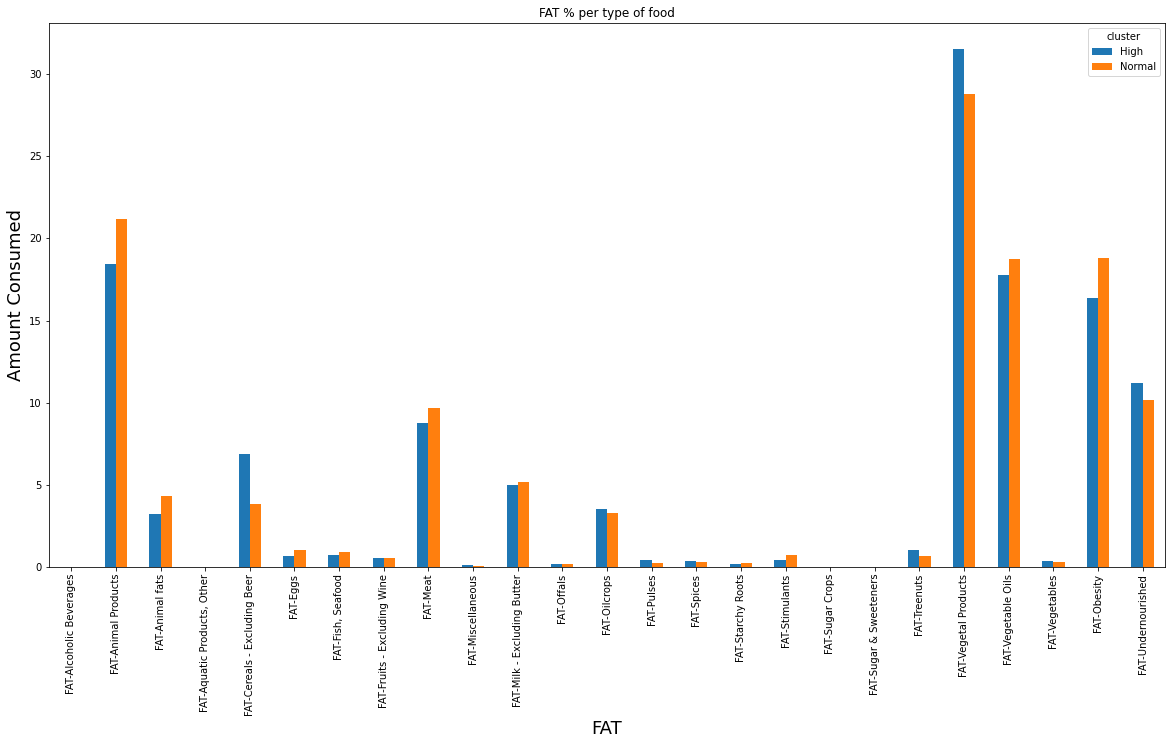

In [ ]:
centroides_death.filter(regex=("FAT*")).T.plot.bar(title="FAT % per type of food")
plt.xlabel("FAT",fontsize=18)
plt.ylabel("Amount Consumed",fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)

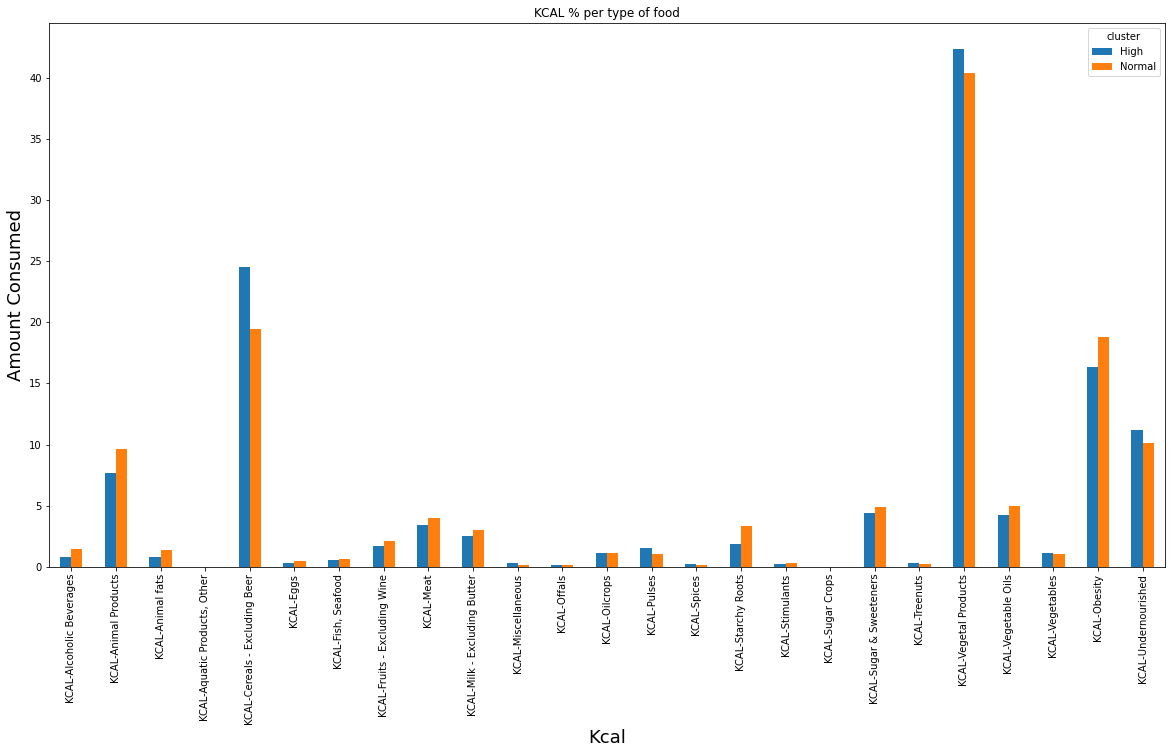

In [ ]:
centroides_death.filter(regex=("KCAL*")).T.plot.bar(title="KCAL % per type of food")
plt.xlabel("Kcal",fontsize=18)
plt.ylabel("Amount Consumed",fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)

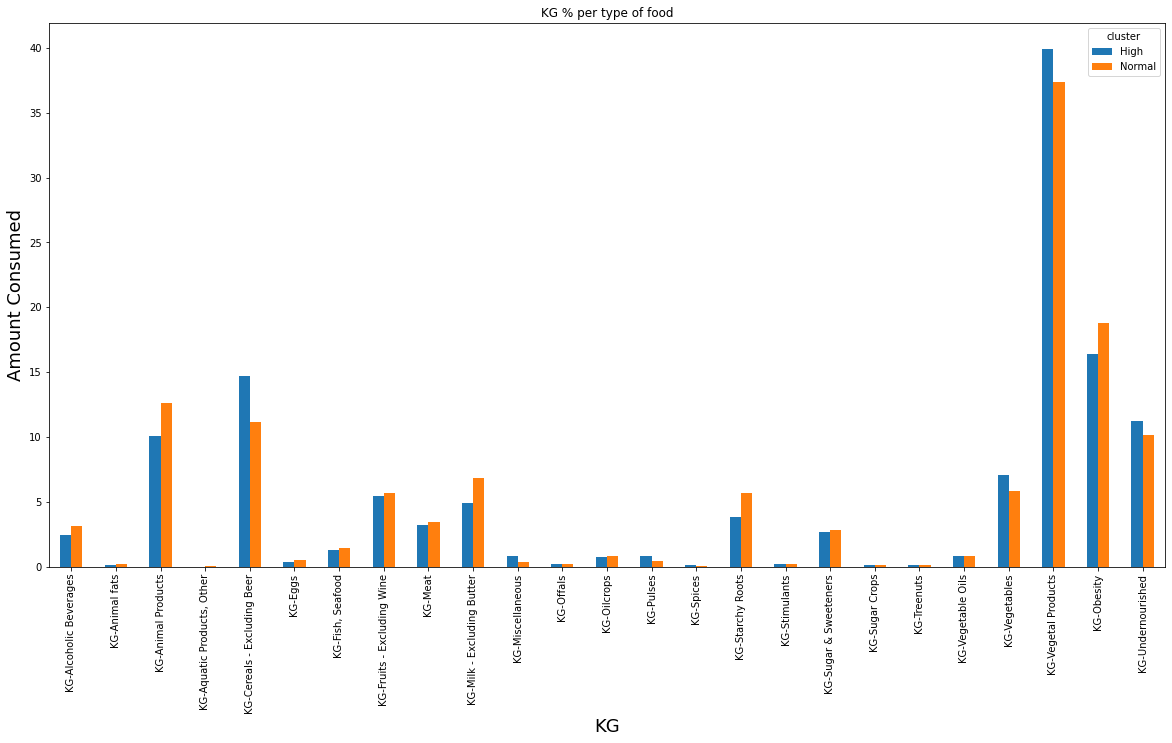

In [ ]:
centroides_death.filter(regex=("KG-*")).T.plot.bar(title="KG % per type of food")
plt.xlabel("KG",fontsize=18)
plt.ylabel("Amount Consumed",fontsize=18)
plt.show()

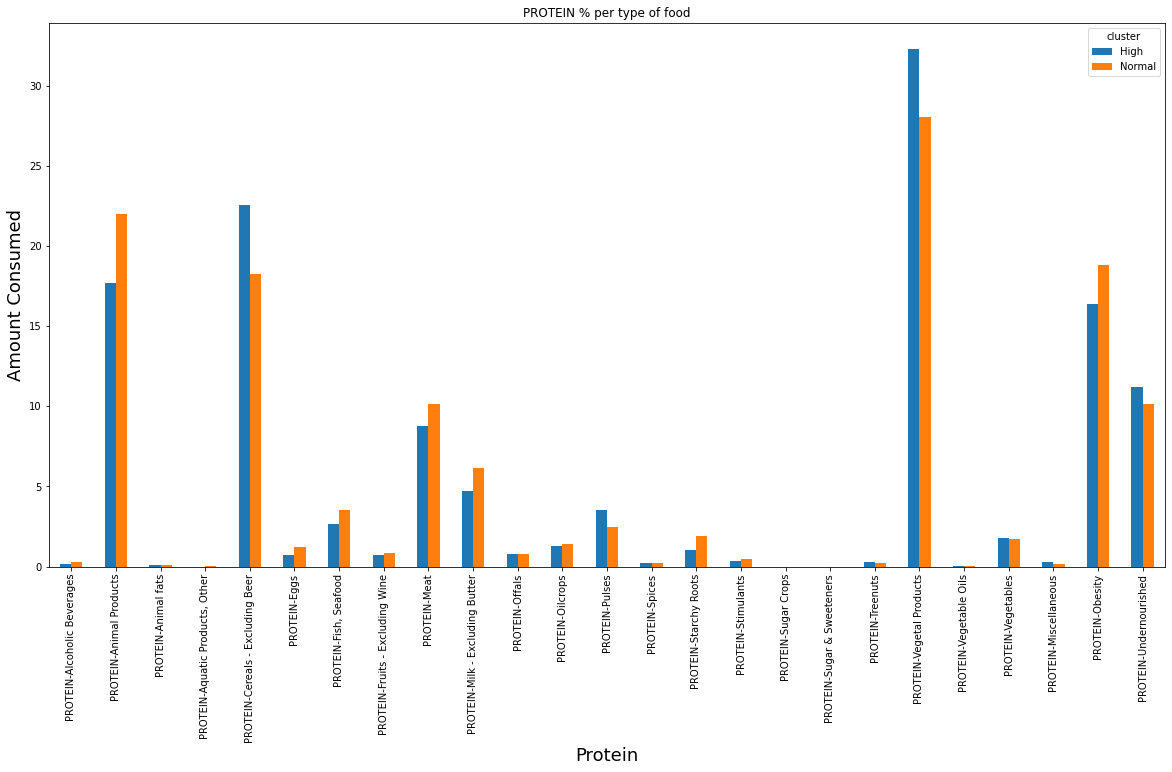

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
centroides_death.filter(regex=("PROTEIN-*")).T.plot.bar(title="PROTEIN % per type of food")
plt.xlabel("Protein",fontsize=18)
plt.ylabel("Amount Consumed",fontsize=18)
plt.show()

In [ ]:
data_norm

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Miscellaneous,KG-Offals,KG-Oilcrops,KG-Pulses,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished
0,0.000000,0.521318,0.415543,0.0,0.405194,0.195145,0.001824,0.040196,0.204454,0.035738,0.460895,0.426940,0.034428,0.072838,0.103385,0.016902,0.028962,0.000000,0.0,0.150997,0.478936,0.385466,0.295344,0.118026,0.508251,0.000000,0.152593,0.109016,0.0,0.985723,0.091992,0.000000,0.152592,0.087892,0.237535,0.021147,0.156082,0.015023,0.066144,0.082036,...,0.019872,0.167836,0.004948,0.084764,0.086628,0.007421,0.237540,0.104954,0.000000,0.101731,0.209843,0.320304,0.694018,0.118026,0.508251,0.000000,0.169046,0.028245,0.000000,1.000000,0.103093,0.000000,0.114001,0.102673,0.324689,0.168951,0.024047,0.068386,0.089443,0.005621,0.210420,0.000000,0.000000,0.073336,0.830743,0.000000,0.199100,0.039017,0.118026,0.508251
1,0.000000,0.846266,0.227414,0.0,0.096782,0.493163,0.015150,0.062737,0.307043,0.037273,1.000000,0.403550,0.108709,0.042662,0.000000,0.017826,0.155742,0.000000,0.0,0.184520,0.153734,0.136329,0.553437,0.500000,0.118812,0.176833,0.700103,0.135770,0.0,0.253910,0.553703,0.033293,0.430819,0.347713,1.000000,0.049738,0.330381,0.102319,0.106970,0.000000,...,0.030655,0.189621,0.076267,0.068316,0.001207,0.041800,0.079258,0.125020,0.000000,0.200159,0.111127,0.592018,0.322812,0.500000,0.118812,0.134700,0.743405,0.072499,0.000000,0.228088,0.499660,0.031236,0.265037,0.322234,1.000000,0.316541,0.045002,0.079763,0.000000,0.069550,0.097072,0.000000,0.008938,0.141543,0.256557,0.074009,0.630175,0.045942,0.500000,0.118812
2,0.000000,0.294800,0.058413,0.0,0.184792,0.360237,0.021861,0.056033,0.117149,0.096251,0.450264,0.146808,0.039800,0.100264,0.058396,0.046412,0.085289,0.000000,0.0,0.172743,0.705300,0.712113,0.432993,0.592275,0.080858,0.017373,0.213326,0.024882,0.0,0.561943,0.279759,0.027047,0.348390,0.093121,0.393805,0.088395,0.074485,0.023977,0.144107,0.097935,...,0.045613,0.070986,0.027904,0.137293,0.084063,0.127784,0.170096,0.156807,0.000000,0.152200,0.445029,0.585138,0.686088,0.592275,0.080858,0.023646,0.299391,0.005506,0.000000,0.665810,0.353716,0.031658,0.240355,0.120876,0.480994,0.093757,0.021514,0.139792,0.095463,0.122817,0.174675,0.000000,0.000000,0.145138,0.700594,0.237004,0.605867,0.118149,0.592275,0.080858
3,0.000000,0.322608,0.086298,0.0,0.320020,0.029805,0.166651,0.032329,0.396531,0.067529,0.059899,0.211750,0.137762,0.121967,0.003836,0.321142,0.033335,0.000000,0.0,0.006190,0.677552,0.556479,0.085854,0.167382,0.429043,0.375926,0.148495,0.033894,0.0,0.328862,0.017726,0.189485,0.248791,0.256315,0.039665,0.055913,0.137492,0.101450,0.198062,0.000000,...,0.0

In [ ]:
pca = PCA(n_components= 3, svd_solver="full")
data_plot = pd.DataFrame(pca.fit_transform(data_norm), index= dataset.index)
data_plot["cluster"] = dataset_with_classes_deaths["cluster"].map({"Normal":0.5,"High":1,"Low":0})
plt.rcParams["figure.figsize"] = (40,20)
fig = plt.figure()

<Figure size 2880x1440 with 0 Axes>

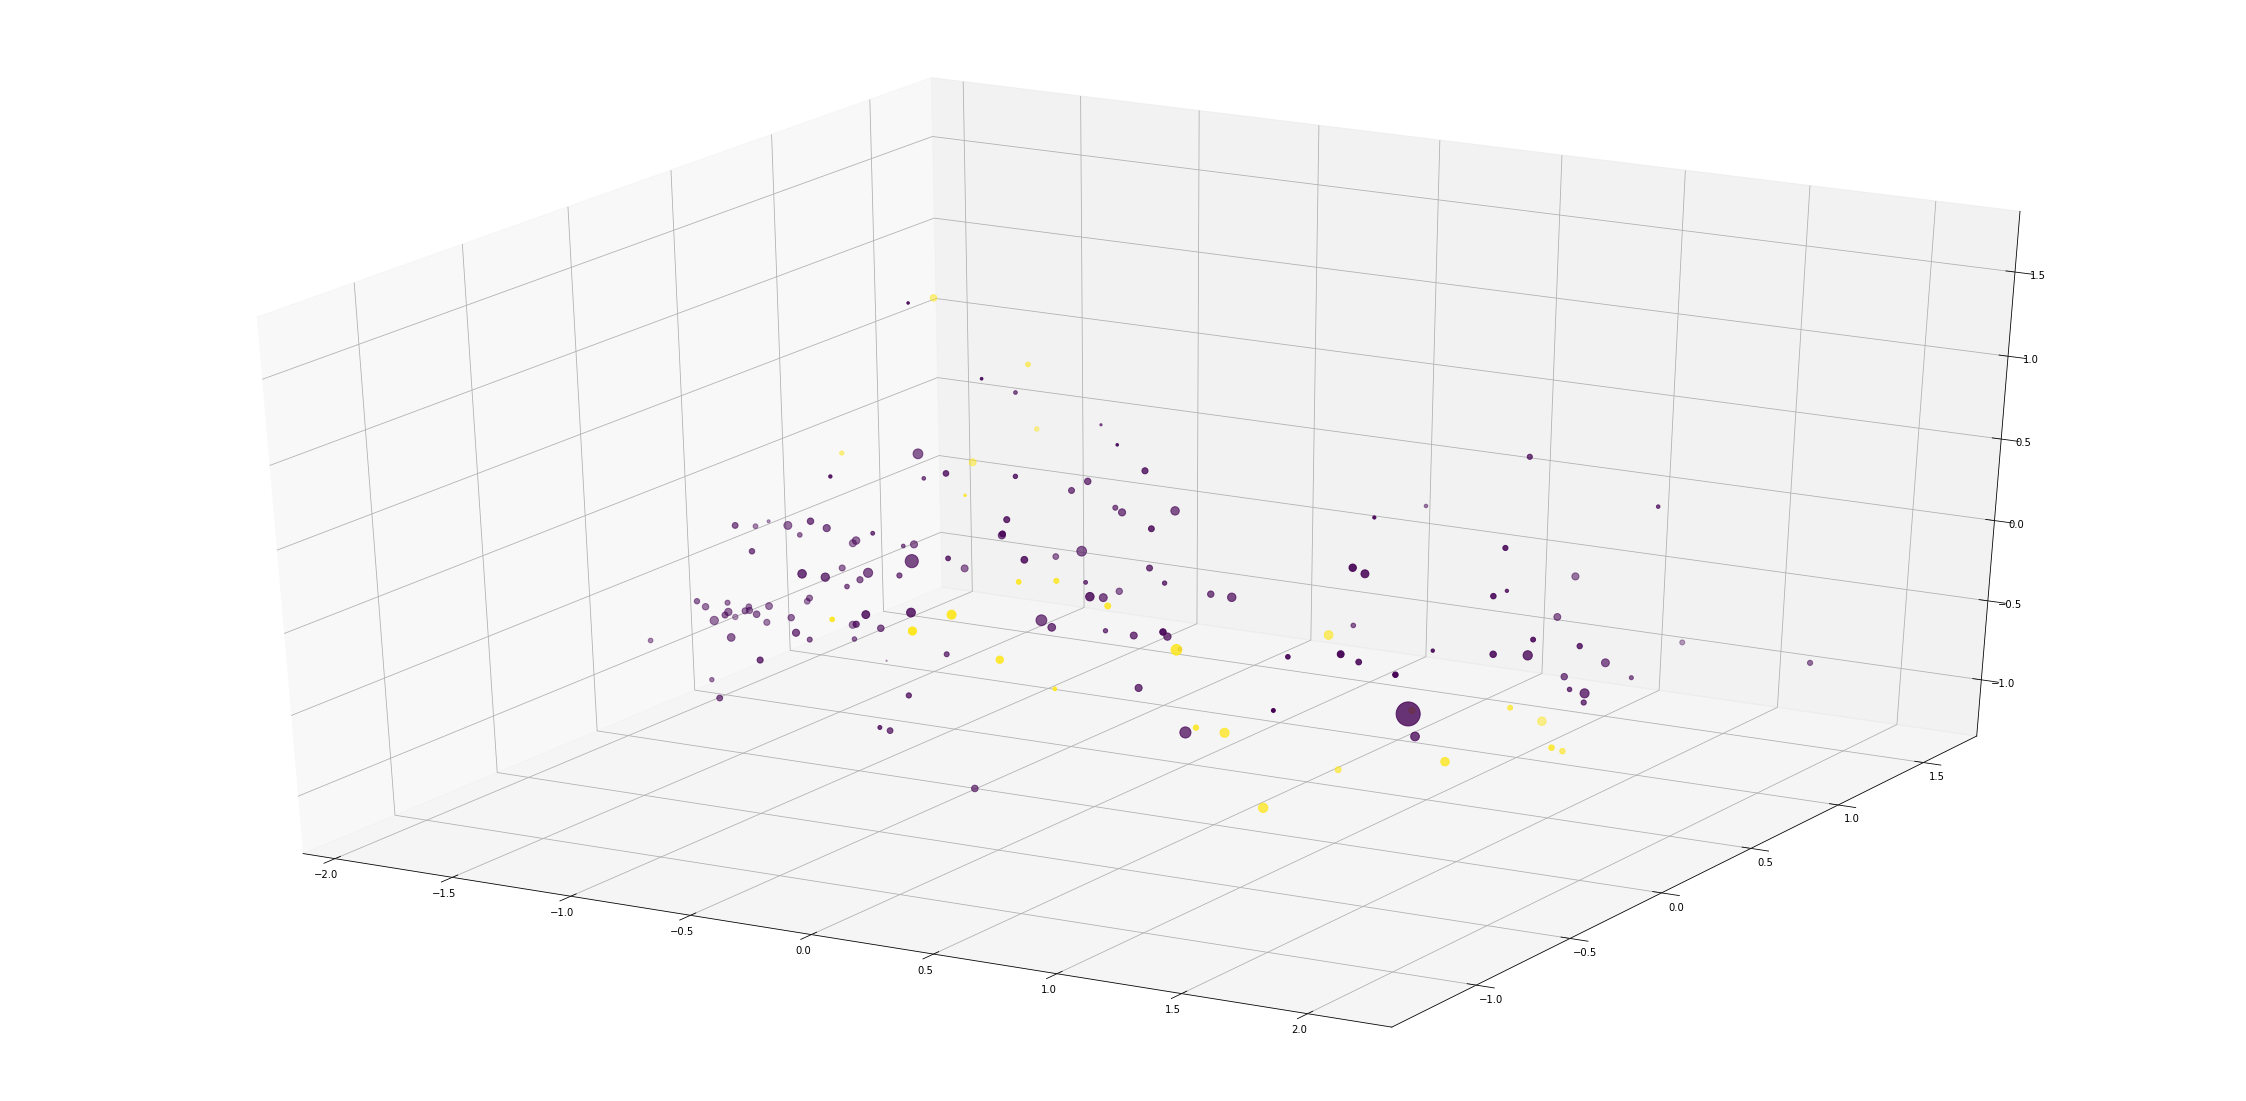

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(data_plot[0],data_plot[1],data_plot[2],c=data_plot["cluster"], s=classes["Deaths"]*2000)

In [ ]:
for ix,data in data_plot.iterrows():
  ax.text(data[0],data[1],data[2], ix)

In [ ]:
def show_plot_bars(data_high,data_low, labels=None):
  if labels is None:
    labels=data_high.index
  plt.rcParams["figure.figsize"] = (10,5)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  width = 0.4
  rect1 = ax.bar(np.arange(data_low.shape[0])-width/2, data_high["mean"], width=width, yerr=data_high["std"])
  rect2 = ax.bar(np.arange(data_low.shape[0])+width/2, data_low["mean"],width=width,yerr=data_low["std"])
  ax.set_xticklabels( labels )
  ax.set_xticks(np.arange(data_low.shape[0]))
  ax.legend( (rect1[0], rect2[0]), ("High Deaths","Low Deaths"))
  plt.ylim(0,100)
  plt.show()

In [ ]:
dataset_with_classes_deaths

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,cluster,Active,Recovered,Deaths,Confirmed
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,...,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,High,0.012574,0.868010,0.043521,0.142134
Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,...,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,Normal,1.123714,0.604130,0.017171,2.967301
Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,...,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,High,0.070767,0.684256,0.026779,0.244897
Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25.0,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,...,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,25.0,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25.0,Normal,0.003419,0.920895,0.023677,0.061687
Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0000,0.0,0.2020,22.

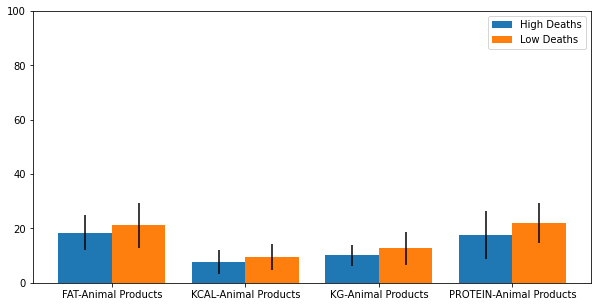

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Animal Products*")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Animal Products*")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low)

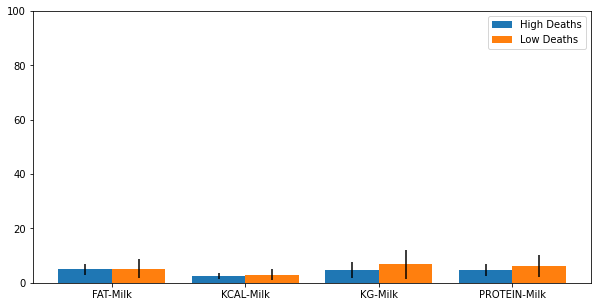

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Milk*")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Milk*")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low,labels=["FAT-Milk","KCAL-Milk","KG-Milk","PROTEIN-Milk"])

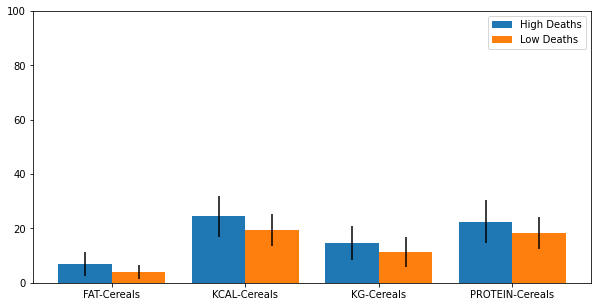

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Cereals*")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Cereals*")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low, labels=["FAT-Cereals","KCAL-Cereals","KG-Cereals","PROTEIN-Cereals"])

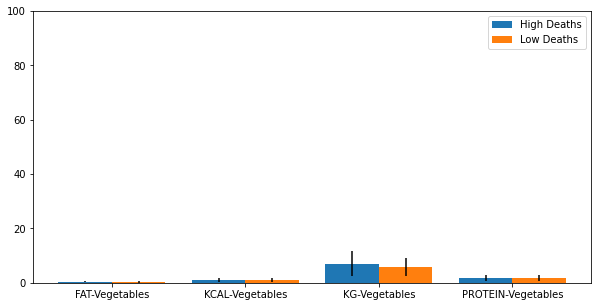

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Vegetables")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Vegetables")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low)

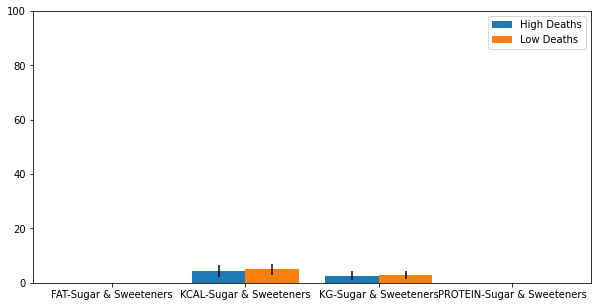

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Sweet*")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Sweet")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low)

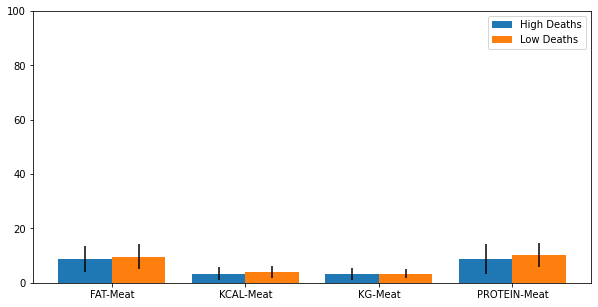

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*Meat")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*Meat")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low)

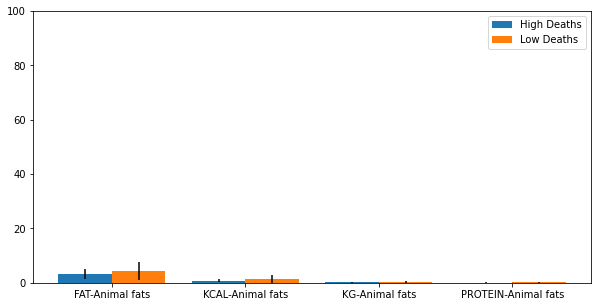

In [ ]:
data_high = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].filter(regex=(".*fats*")).describe().T[["mean","std"]]
data_low = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].filter(regex=(".*fats*")).describe().T[["mean","std"]]
show_plot_bars(data_high,data_low)

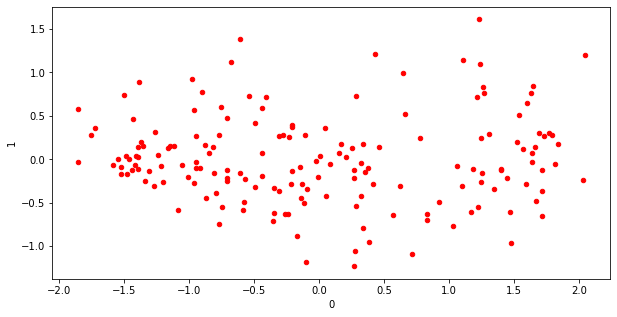

In [ ]:
data_plot.plot.scatter(x=0,y=1,c="red",cmap="viridis")

In [ ]:
data_plot.sort_values(by=0).head(50)
data_plot.sort_values(by=0).iloc[70:120]
data_plot.sort_values(by=0).tail(30)
plt.rcParams["figure.figsize"] = (20,10)
data_plot

,0,1,2,cluster
Country,,,,
Afghanistan,1.168156,-0.601353,-0.769847,1.0
Albania,-1.082600,-0.585068,-0.608491,0.5
Algeria,0.386224,-0.949292,0.137390,1.0
Angola,1.264101,0.837799,-0.330758,0.5
Antigua and Barbuda,-0.960148,0.570036,0.292564,1.0
...,...,...,...,...
Venezuela (Bolivarian Republic of),0.088322,-0.047988,-0.216174,0.5
Vietnam,0.207393,0.030564,0.151940,0.5
Yemen,1.448890,-0.214710,-0.339708,0.5


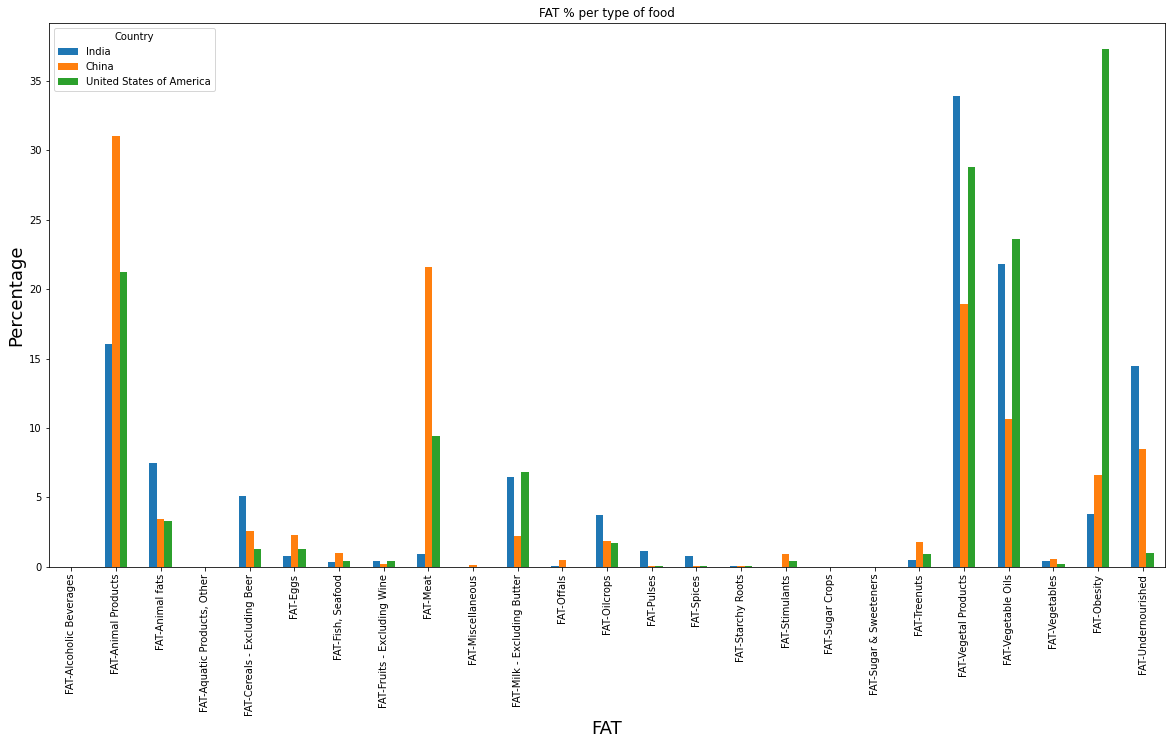

In [ ]:
dataset.loc[["India","China","United States of America"]].filter(regex=("FAT-*")).T.plot.bar(title="FAT % per type of food")
plt.xlabel("FAT",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

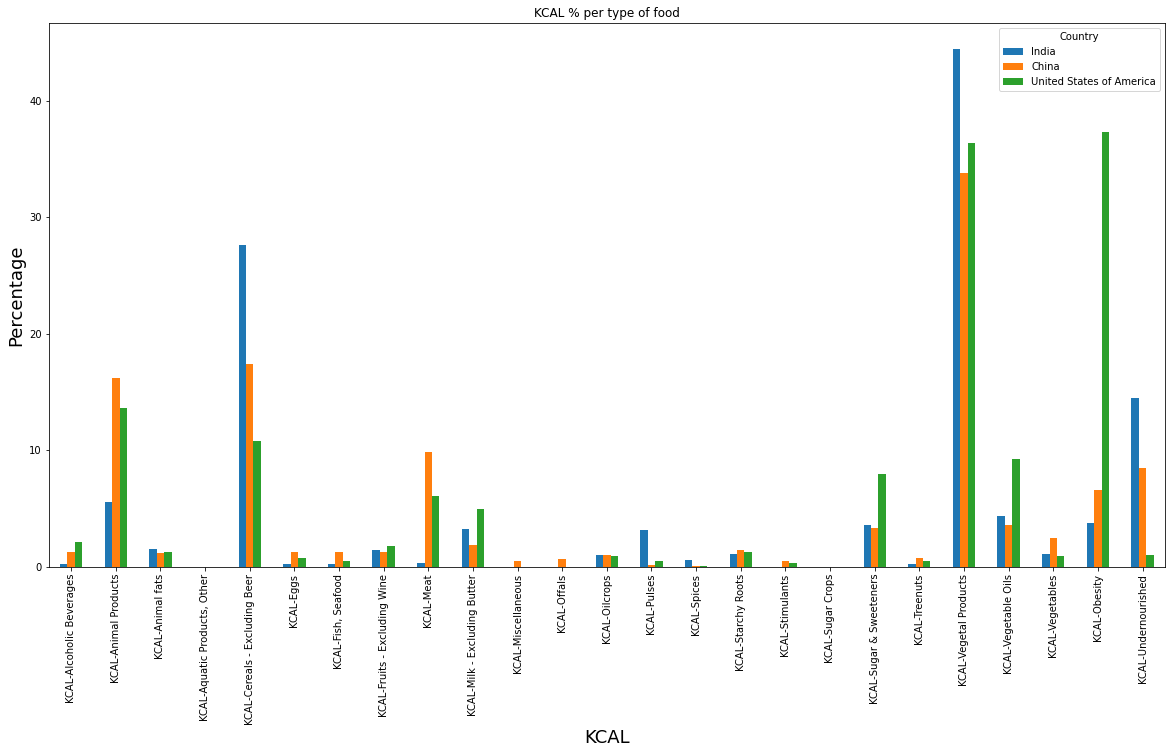

In [ ]:
dataset.loc[["India","China","United States of America"]].filter(regex=("KCAL-*")).T.plot.bar(title="KCAL % per type of food")
plt.xlabel("KCAL",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

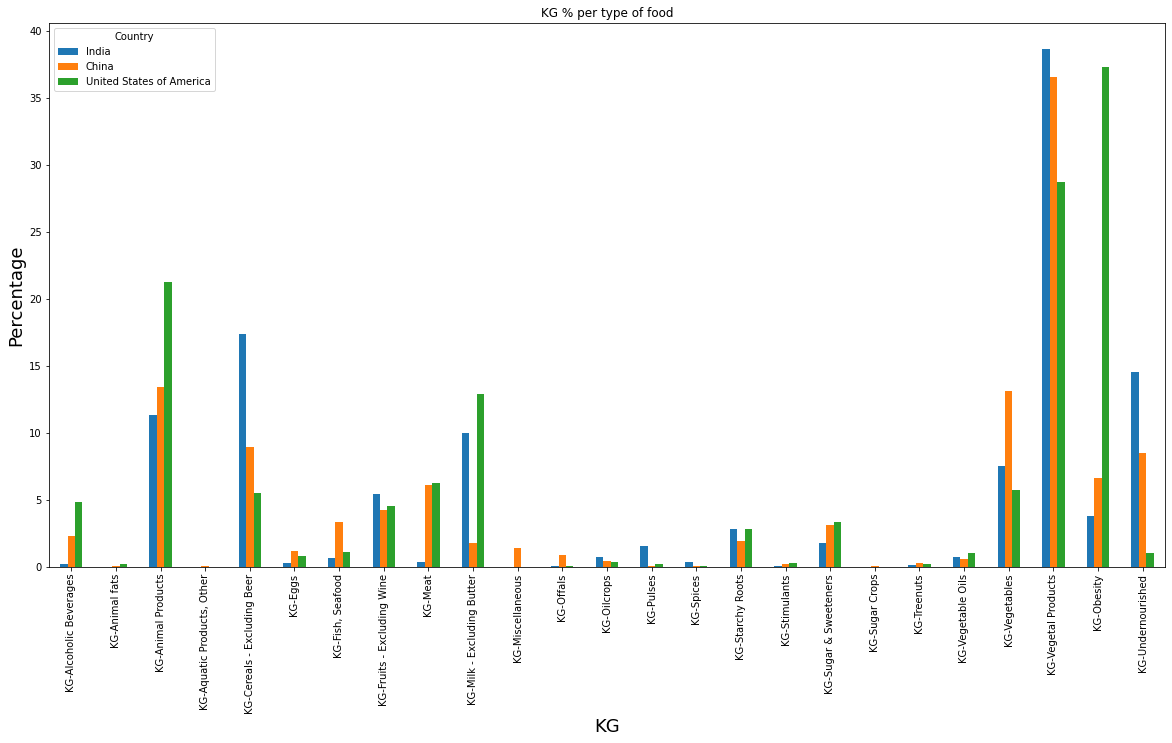

In [ ]:
dataset.loc[["India","China","United States of America"]].filter(regex=("KG-*")).T.plot.bar(title="KG % per type of food")
plt.xlabel("KG",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

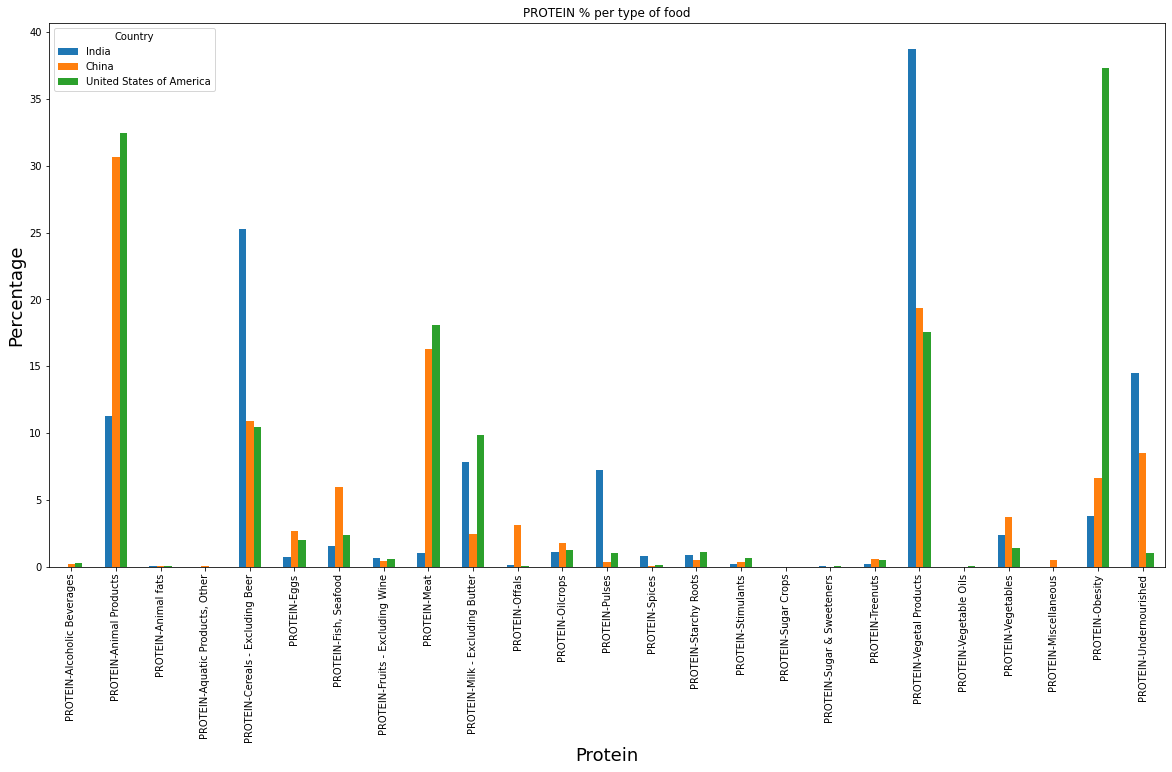

In [ ]:
dataset.loc[["India","China","United States of America"]].filter(regex=("PROTEIN-*")).T.plot.bar(title="PROTEIN % per type of food")
plt.xlabel("Protein",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

In [ ]:
classes.loc[["India","China","United States of America"]]

,Active,Recovered,Deaths,Confirmed
Country,,,,
India,0.010625,0.971942,0.014317,0.773256
China,0.000126,0.934269,0.048053,0.007156
United States of America,8.019819,0.000000,0.017170,8.159922


In [ ]:
centroides_death

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Spices,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,Active,Recovered,Deaths,Confirmed
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,0.000000,18.465980,3.206473,0.000000,6.890123,0.657960,0.703840,0.516787,8.749277,0.087857,4.962800,0.187217,3.532260,0.429743,0.358703,0.153923,0.42070,0.003057,0.000000,1.008530,31.534800,17.801627,0.328373,16.360000,11.220000,0.815653,7.668390,0.824510,0.000000,24.484457,0.271077,0.545063,1.736540,3.395163,2.479127,0.270157,0.145920,1.106547,1.567917,0.192440,...,0.103267,3.830970,0.191737,2.654673,0.109997,0.149330,0.815180,7.085313,39.912397,16.360000,11.220000,0.176140,17.717037,0.073383,0.001113,22.538940,0.731807,2.657110,0.718010,8.753987,4.720503,0.779677,1.293963,3.504190,0.236953,1.046217,0.371303,0.00673,0.002080,0.308980,32.284157,0.021463,1.775027,0.28123,16.360000,11.220000,0.190936,0.788328,0.020764,1.004347
Normal,0.001256,21.173514,4.338160,0.000546,3.837924,1.017304,0.881851,0.547545,9.653923,0.049889,5.140403,0.140694,3.283689,0.224879,0.264654,0.244212,0.69231,0.004334,0.001709,0.632617,28.826453,18.736664,0.305470,18.788571,10.148571,1.434385,9.643016,1.362329,0.003384,19.482694,0.462239,0.650023,2.070996,4.003768,3.019896,0.135576,0.140213,1.102880,1.010524,0.181222,...,0.088385,5.657742,0.204134,2.830067,0.092814,0.110647,0.859348,5.871755,37.365356,18.788571,10.148571,0.281381,21.985391,0.115696,0.010956,18.271926,1.253538,3.505501,0.867244,10.149173,6.178443,0.772098,1.385480,2.474384,0.230699,1.893631,0.456218,0.00351,0.010724,0.229648,28.014746,0.020664,1.728387,0.16055,18.788571,10.148571,0.607085,0.785856,0.021034,2.231483


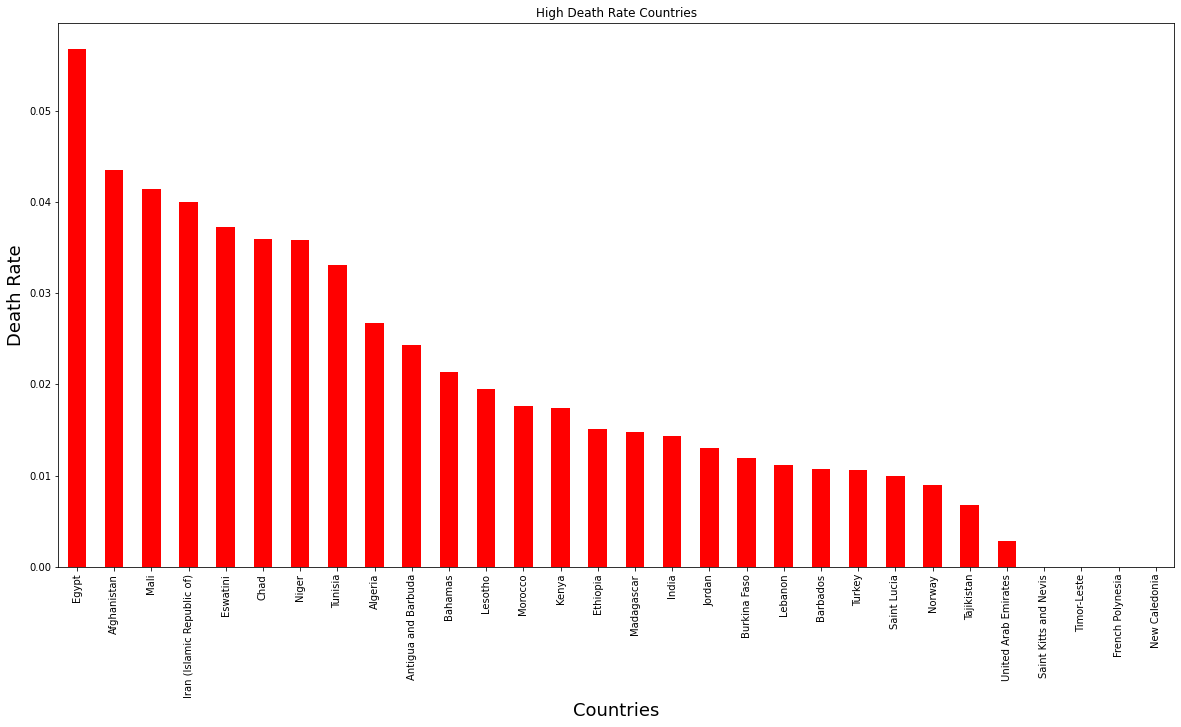

In [ ]:
paises_mas_muertos = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"]
paises_mas_muertos.sort_values(by="Deaths", ascending=False)["Deaths"].plot(kind="bar",color="red",title="High Death Rate Countries")
dataset_with_classes_deaths.groupby("cluster")[["KG-Obesity","KG-Undernourished"]].describe()
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Death Rate",fontsize=18)
plt.rcParams["figure.figsize"] = (10,5)

Text(0, 0.5, 'Death Rate')

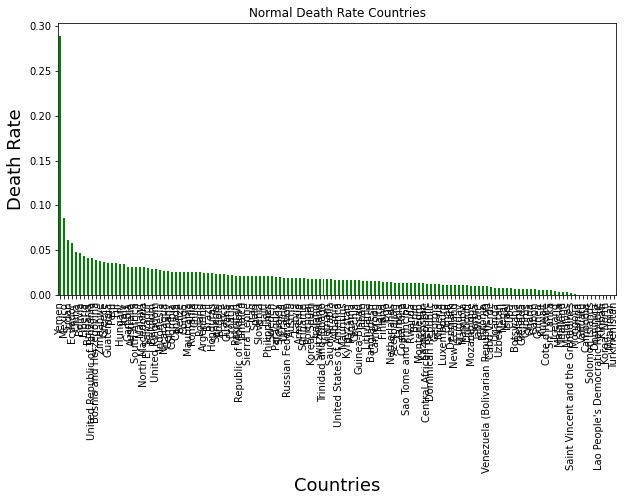

In [ ]:
paises_mas_muertos = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"]
paises_mas_muertos.sort_values(by="Deaths", ascending=False)["Deaths"].plot(kind="bar",color="green",title="Normal Death Rate Countries")
dataset_with_classes_deaths.groupby("cluster")[["KG-Obesity","KG-Undernourished"]].describe()
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Death Rate",fontsize=18)
#plt.rcParams["figure.figsize"] = (35,5)

In [ ]:
dataset_with_classes_deaths

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,cluster,Active,Recovered,Deaths,Confirmed
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,...,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,High,0.012574,0.868010,0.043521,0.142134
Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,...,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,Normal,1.123714,0.604130,0.017171,2.967301
Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,...,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,High,0.070767,0.684256,0.026779,0.244897
Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25.0,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,...,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,25.0,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25.0,Normal,0.003419,0.920895,0.023677,0.061687
Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0000,0.0,0.2020,22.

In [ ]:
data_obesity_undernourished = pd.concat([pd.DataFrame(dataset_with_classes_deaths.groupby("cluster")["KG-Undernourished"].describe()["mean"]).add_prefix("Undernourished-"),
  pd.DataFrame(dataset_with_classes_deaths.groupby("cluster")["KG-Obesity"].describe()["mean"]).add_prefix("Obesity-")], axis=1)
data_obesity_undernourished.columns=["Undernourished","Obesity"]
data_obesity_undernourished.T
data_kcal = pd.read_csv("FAOSTAT_data_9-19-2021.csv")
data_kcal.set_index("Area", drop=True, inplace=True)
data_kcal

,Domain Code,Domain,Area Code (FAO),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Area,,,,,,,,,,,,,,
Afghanistan,FS,Suite of Food Security Indicators,2,6126,Value,22013,"Gross domestic product per capita, PPP, dissem...",2020,2020,I$,1979,X,International reliable sources,NaN
Afghanistan,FS,Suite of Food Security Indicators,2,6121,Value,21045,Percentage of population using safely managed ...,2020,2020,%,27.6,X,International reliable sources,NaN
Afghanistan,FS,Suite of Food Security Indicators,2,6121,Value,21047,Percentage of population using at least basic ...,2020,2020,%,75.1,X,International reliable sources,NaN
Afghanistan,FS,Suite of Food Security Indicators,2,6121,Value,21048,Percentage of population using at least basic ...,2020,2020,%,50.5,X,International reliable sources,NaN
Afghanistan,FS,Suite of Food Security Indicators,2,6121,Value,21025,Percentage of children under 5 years of age wh...,2020,2020,%,35.1,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,FS,Suite of Food Security Indicators,181,6132,Value,210410,Number of children under 5 years of age who ar...,2020,2020,millions,0.1,X,International reliable sources,NaN
Zimbabwe,FS,Suite of Food Security Indicators,181,6128,Value,21056,Minimum dietary energy requirement (kcal/cap/...,2020,2020,kcal/capita/day,1752,F,FAO estimate,NaN
Zimbabwe,FS,Suite of Food Security Indicators,181,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2020,2020,kcal/capita/day,2240,F,FAO estimate,NaN


In [ ]:
paises_mas_muertes = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="High"].index
paises_mas_muertes

Index(['Afghanistan', 'Algeria', 'Antigua and Barbuda', 'Bahamas', 'Barbados',
       'Burkina Faso', 'Chad', 'Egypt', 'Eswatini', 'Ethiopia',
       'French Polynesia', 'India', 'Iran (Islamic Republic of)', 'Jordan',
       'Kenya', 'Lebanon', 'Lesotho', 'Madagascar', 'Mali', 'Morocco',
       'New Caledonia', 'Niger', 'Norway', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Tajikistan', 'Timor-Leste', 'Tunisia', 'Turkey',
       'United Arab Emirates'],
      dtype='object', name='Country')

In [ ]:
paises_menos_muertes = dataset_with_classes_deaths[dataset_with_classes_deaths["cluster"]=="Normal"].index
print(paises_menos_muertes)

Index(['Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=140)


In [ ]:
bad_df = data_kcal.index.isin(paises_mas_muertes)
bad_df

array([ True,  True,  True, ..., False, False, False])

In [ ]:
data_kcal[~bad_df]["Value"].describe()
data_kcal.index.isin(paises_mas_muertes)
#display(f'Menos muertes: {data_kcal[~bad_df]["Value"].mean()}')
#display(f'Más muertes: {data_kcal.loc[paises_mas_muertes]["Value"].mean()}')

array([ True,  True,  True, ..., False, False, False])

In [ ]:
data_kcal[~bad_df]["Value"].describe()
paises_mas_muertos.sort_values(by="Confirmed",ascending=True)
dataset_with_classes_deaths.sort_values(by="Deaths",ascending=False).index[:30].sort_values()
dataset_with_classes_deaths.shape
dataset_with_classes_deaths

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,FAT-Obesity,FAT-Undernourished,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,...,KG-Starchy Roots,KG-Stimulants,KG-Sugar & Sweeteners,KG-Sugar Crops,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,KG-Obesity,KG-Undernourished,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,PROTEIN-Obesity,PROTEIN-Undernourished,cluster,Active,Recovered,Deaths,Confirmed
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,...,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,High,0.012574,0.868010,0.043521,0.142134
Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,...,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,Normal,1.123714,0.604130,0.017171,2.967301
Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,...,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,High,0.070767,0.684256,0.026779,0.244897
Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25.0,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,...,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8,25.0,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25.0,Normal,0.003419,0.920895,0.023677,0.061687
Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0000,0.0,0.2020,22.

In [ ]:
disease = pd.read_csv("Disease_Dataset.csv",encoding='latin-1')
disease

,Country,Affected,ckd,cardio,copd,diabeties
0,Afghanistan,14361,5026.0,1579.0,1953.0,2154.0
1,Albania,133442,46704.0,14678.0,18148.0,20016.0
2,Algeria,178043,62315.0,19584.0,24213.0,26706.0
3,Angola,43269,15144.0,4759.0,5884.0,6490.0
4,Antigua and Barbuda,1320,462.0,142.0,178.0,190.0
...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),309981,8693.0,34097.0,42157.0,46497.0
166,Vietnam,189066,66173.0,207979.0,25712.0,28359.0
167,Yemen,7104,2486.0,781.0,966.0,1065.0
168,Zambia,198455,69459.0,21830.0,26989.0,29768.0


In [ ]:
disease.set_index(disease["Country"],drop=True, inplace=True)
disease = disease.drop(["Country"],axis=1)
disease

,Affected,ckd,cardio,copd,diabeties
Country,,,,,
Afghanistan,14361,5026.0,1579.0,1953.0,2154.0
Albania,133442,46704.0,14678.0,18148.0,20016.0
Algeria,178043,62315.0,19584.0,24213.0,26706.0
Angola,43269,15144.0,4759.0,5884.0,6490.0
Antigua and Barbuda,1320,462.0,142.0,178.0,190.0
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),309981,8693.0,34097.0,42157.0,46497.0
Vietnam,189066,66173.0,207979.0,25712.0,28359.0
Yemen,7104,2486.0,781.0,966.0,1065.0


In [ ]:
under_disease = dataset_with_classes_deaths[["FAT-Undernourished","FAT-Obesity"]].astype(float)
under_disease.rename(columns={"FAT-Undernourished": "Undernourished", "FAT-Obesity": "Obesity"},inplace=True, errors='raise')
#under_disease.set_index(under_disease["Country"],drop=True,inplace=True)
#under_disease=under_disease.drop(["Country"],axis=1)
under_disease

,Undernourished,Obesity
Country,,
Afghanistan,29.8,4.5
Albania,6.2,22.3
Algeria,3.9,26.6
Angola,25.0,6.8
Antigua and Barbuda,-1.0,19.1
...,...,...
Venezuela (Bolivarian Republic of),21.2,25.2
Vietnam,9.3,2.1
Yemen,38.9,14.1


In [ ]:
#d=[under_disease,disease]
#result=pd.concat(d)
#result
disease_dataset = pd.concat([under_disease,disease],axis=1)
disease_dataset

,Undernourished,Obesity,Affected,ckd,cardio,copd,diabeties
Country,,,,,,,
Afghanistan,29.8,4.5,14361,5026.0,1579.0,1953.0,2154.0
Albania,6.2,22.3,133442,46704.0,14678.0,18148.0,20016.0
Algeria,3.9,26.6,178043,62315.0,19584.0,24213.0,26706.0
Angola,25.0,6.8,43269,15144.0,4759.0,5884.0,6490.0
Antigua and Barbuda,-1.0,19.1,1320,462.0,142.0,178.0,190.0
...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),21.2,25.2,309981,8693.0,34097.0,42157.0,46497.0
Vietnam,9.3,2.1,189066,66173.0,207979.0,25712.0,28359.0
Yemen,38.9,14.1,7104,2486.0,781.0,966.0,1065.0


In [ ]:
Normalizador_MinMaxScaler = MinMaxScaler().fit(disease_dataset)
data_dis = Normalizador_MinMaxScaler.transform(disease_dataset)
data_dis=pd.DataFrame(data_dis)
data_dis.columns = disease_dataset.columns
data_dis

,Undernourished,Obesity,Affected,ckd,cardio,copd,diabeties
0,0.508251,0.118026,0.000405,2.197999e-07,0.000405,0.000045,0.000045
1,0.118812,0.500000,0.003765,2.042486e-06,0.003765,0.000419,0.000419
2,0.080858,0.592275,0.005024,2.725195e-06,0.005024,0.000559,0.000559
3,0.429043,0.167382,0.001221,6.622860e-07,0.001221,0.000136,0.000136
4,0.000000,0.431330,0.000037,2.020445e-08,0.000036,0.000004,0.000004
...,...,...,...,...,...,...,...
165,0.366337,0.562232,0.008747,3.801672e-07,0.008746,0.000973,0.000973
166,0.169967,0.066524,0.005335,2.893915e-06,0.053349,0.000593,0.000594
167,0.658416,0.324034,0.000200,1.087192e-07,0.000200,0.000022,0.000022
168,0.787129,0.160944,0.005600,3.037620e-06,0.005600,0.000623,0.000623


In [ ]:
pca = PCA(n_components= 0.95, svd_solver="full")
dataset_pca = pd.DataFrame(pca.fit_transform(data_dis), index=disease_dataset.index)
kmeans = KMeans(n_clusters=20, random_state=0).fit(dataset_pca)
clusters = kmeans.predict(dataset_pca)
disease_dataset["cluster"] = clusters
disease_dataset

,Undernourished,Obesity,Affected,ckd,cardio,copd,diabeties,cluster
Country,,,,,,,,
Afghanistan,29.8,4.5,14361,5026.0,1579.0,1953.0,2154.0,11
Albania,6.2,22.3,133442,46704.0,14678.0,18148.0,20016.0,1
Algeria,3.9,26.6,178043,62315.0,19584.0,24213.0,26706.0,16
Angola,25.0,6.8,43269,15144.0,4759.0,5884.0,6490.0,11
Antigua and Barbuda,-1.0,19.1,1320,462.0,142.0,178.0,190.0,13
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),21.2,25.2,309981,8693.0,34097.0,42157.0,46497.0,9
Vietnam,9.3,2.1,189066,66173.0,207979.0,25712.0,28359.0,17
Yemen,38.9,14.1,7104,2486.0,781.0,966.0,1065.0,0


In [ ]:
dataset_other=disease_dataset.copy()
dataset_other["cluster"]=dataset_other["cluster"].map({0:"Normal",1:"Low",2:"Low",3:"High",4:"High",5:"Normal",6:"Normal",7:"Low",8:"Normal",9:"Normal",10:"Normal",11:"Low",12:"Low",13:"Normal",14:"Normal",15:"Low",16:"Normal",17:"High",18:"Low",19:"Low",20:"Normal"})
dataset_other["cluster"]=dataset_other["cluster"].map({"Low":"Normal","High":"High","Normal":"Normal"})
other_disease_dataset=dataset_other.groupby("cluster")
centroides_disease=other_disease_dataset.mean()
centroides_disease

,Undernourished,Obesity,Affected,ckd,cardio,copd,diabeties
cluster,,,,,,,
High,13.028571,4.400000,3.167683e+05,1.088979e+09,42217.799048,47346.129905,52223.747619
Normal,9.958389,20.327517,1.281148e+06,7.889289e+06,139091.662215,457944.960268,446538.763423


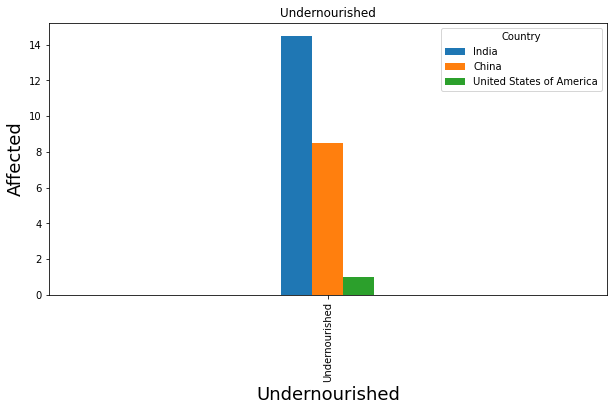

In [ ]:
disease_dataset.loc[["India","China","United States of America"]].filter(regex=("Undernourished")).T.plot.bar(title="Undernourished",width = 0.1)
plt.xlabel("Undernourished",fontsize=18)
plt.ylabel("Affected",fontsize=18)
plt.show()

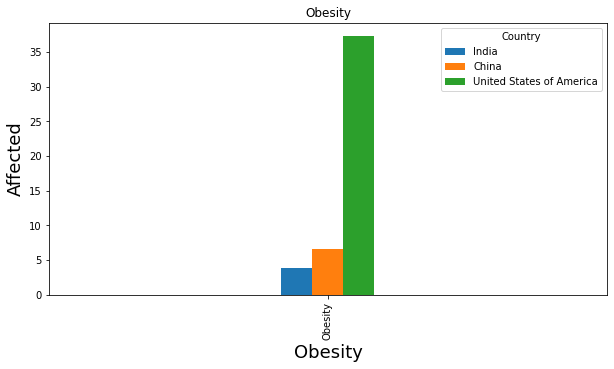

In [ ]:
disease_dataset.loc[["India","China","United States of America"]].filter(regex=("Obesity")).T.plot.bar(title="Obesity",width = 0.1)
plt.xlabel("Obesity",fontsize=18)
plt.ylabel("Affected",fontsize=18)
plt.show()

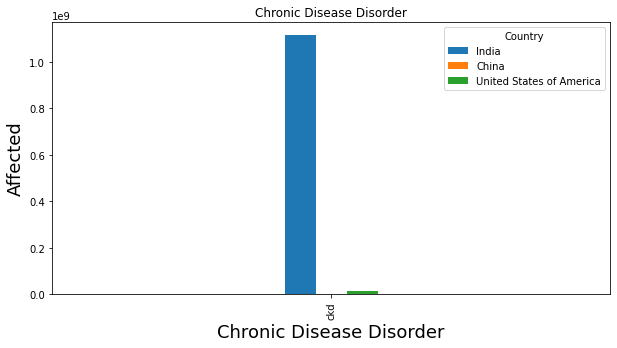

In [ ]:
disease_dataset.loc[["India","China","United States of America"]].filter(regex=("ckd")).T.plot.bar(title="Chronic Disease Disorder",width = 0.1)
plt.xlabel("Chronic Disease Disorder",fontsize=18)
plt.ylabel("Affected",fontsize=18)
plt.show()

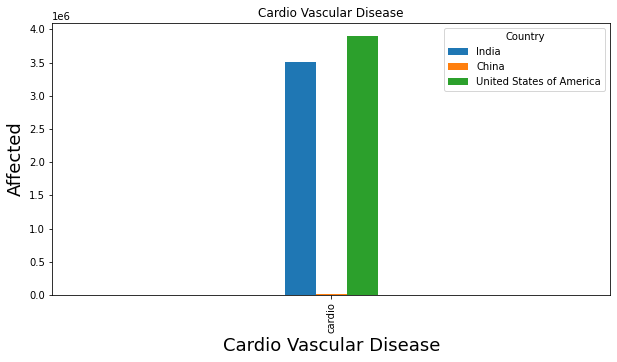

In [ ]:
disease_dataset.loc[["India","China","United States of America"]].filter(regex=("cardio")).T.plot.bar(title="Cardio Vascular Disease",width = 0.1)
plt.xlabel("Cardio Vascular Disease",fontsize=18)
plt.ylabel("Affected",fontsize=18)
plt.show()

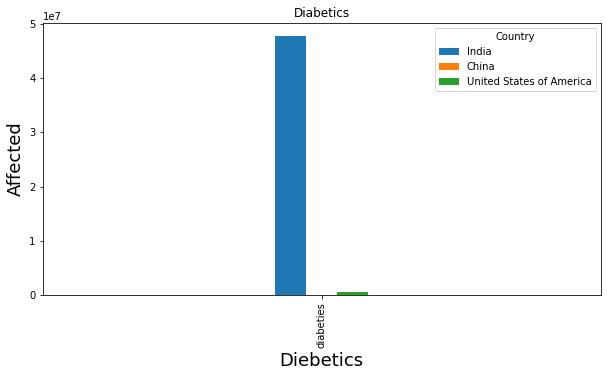

In [ ]:
disease_dataset.loc[["India","China","United States of America"]].filter(regex=("diabeties")).T.plot.bar(title="Diabetics",width = 0.1)
plt.xlabel("Diebetics",fontsize=18)
plt.ylabel("Affected",fontsize=18)
plt.show()

Text(0, 0.5, 'Affected')

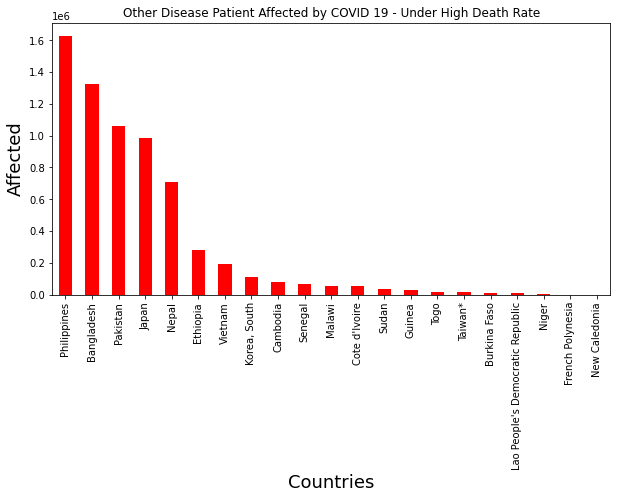

In [ ]:
other_mas_muertos = dataset_other[dataset_other["cluster"]=="High"]
other_mas_muertos.sort_values(by="Affected",ascending=False)["Affected"].plot(kind="bar",color="red",title="Other Disease Patient Affected by COVID 19 - Under High Death Rate")
#plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Affected",fontsize=18)

Text(0, 0.5, 'Affected')

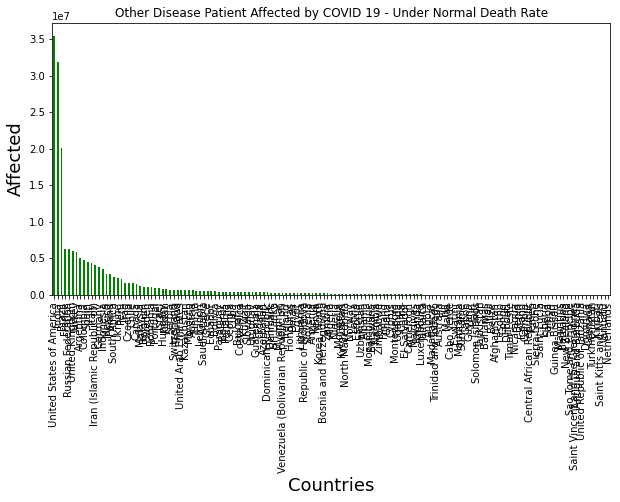

In [ ]:
other_mis_muertos = dataset_other[dataset_other["cluster"]=="Normal"]
other_mis_muertos.sort_values(by="Affected",ascending=False)["Affected"].plot(kind="bar",color="green",title="Other Disease Patient Affected by COVID 19 - Under Normal Death Rate")
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Affected",fontsize=18)

In [ ]:
other_mas_muertos=other_mas_muertos.index
#len(other_mas_muertos)
summa=0
for i in other_mas_muertos:
  summa+=1
print(summa)

21


In [ ]:
other_mis_muertos=other_mis_muertos.index
other_mis_muertos
summa=0
for i in other_mis_muertos:
  summa+=1
print(summa)

149


In [ ]:
for i in other_mas_muertos:
  if i in paises_mas_muertes:
    print(i)

Burkina Faso
Ethiopia
French Polynesia
New Caledonia
Niger


In [ ]:
data_classification_dataset=dataset_with_classes_deaths.copy()
data_classification_dataset = data_classification_dataset.drop(["FAT-Obesity", "FAT-Undernourished", "KCAL-Obesity","KCAL-Undernourished","KG-Obesity","KG-Undernourished","PROTEIN-Obesity","PROTEIN-Undernourished"], axis=1)
data_classification_dataset.rename(columns={"cluster": "Dietary_Cluster"},inplace=True, errors='raise')
dataset_other
data_classification_dataset = pd.concat([data_classification_dataset,dataset_other],axis=1)
data_classification_dataset.rename(columns={"cluster": "Other_Disease_Cluster"},inplace=True, errors='raise')
data_classification_dataset.to_csv("data_classification_dataset.csv",sep=',')
data_classification_dataset

,FAT-Alcoholic Beverages,FAT-Animal Products,FAT-Animal fats,"FAT-Aquatic Products, Other",FAT-Cereals - Excluding Beer,FAT-Eggs,"FAT-Fish, Seafood",FAT-Fruits - Excluding Wine,FAT-Meat,FAT-Miscellaneous,FAT-Milk - Excluding Butter,FAT-Offals,FAT-Oilcrops,FAT-Pulses,FAT-Spices,FAT-Starchy Roots,FAT-Stimulants,FAT-Sugar Crops,FAT-Sugar & Sweeteners,FAT-Treenuts,FAT-Vegetal Products,FAT-Vegetable Oils,FAT-Vegetables,KCAL-Alcoholic Beverages,KCAL-Animal Products,KCAL-Animal fats,"KCAL-Aquatic Products, Other",KCAL-Cereals - Excluding Beer,KCAL-Eggs,"KCAL-Fish, Seafood",KCAL-Fruits - Excluding Wine,KCAL-Meat,KCAL-Milk - Excluding Butter,KCAL-Miscellaneous,KCAL-Offals,KCAL-Oilcrops,KCAL-Pulses,KCAL-Spices,KCAL-Starchy Roots,KCAL-Stimulants,...,KG-Treenuts,KG-Vegetable Oils,KG-Vegetables,KG-Vegetal Products,PROTEIN-Alcoholic Beverages,PROTEIN-Animal Products,PROTEIN-Animal fats,"PROTEIN-Aquatic Products, Other",PROTEIN-Cereals - Excluding Beer,PROTEIN-Eggs,"PROTEIN-Fish, Seafood",PROTEIN-Fruits - Excluding Wine,PROTEIN-Meat,PROTEIN-Milk - Excluding Butter,PROTEIN-Offals,PROTEIN-Oilcrops,PROTEIN-Pulses,PROTEIN-Spices,PROTEIN-Starchy Roots,PROTEIN-Stimulants,PROTEIN-Sugar Crops,PROTEIN-Sugar & Sweeteners,PROTEIN-Treenuts,PROTEIN-Vegetal Products,PROTEIN-Vegetable Oils,PROTEIN-Vegetables,PROTEIN-Miscellaneous,Dietary_Cluster,Active,Recovered,Deaths,Confirmed,Undernourished,Obesity,Affected,ckd,cardio,copd,diabeties,Other_Disease_Cluster
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0000,0.0,0.7513,28.3684,17.0831,0.3593,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,...,0.0770,0.5345,6.7642,40.5645,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,High,0.012574,0.868010,0.043521,0.142134,29.8,4.5,14361,5026.0,1579.0,1953.0,2154.0,Normal
Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0000,0.0,0.9181,17.9998,9.2443,0.6503,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,...,0.1515,0.3261,11.7753,31.2304,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,Normal,1.123714,0.604130,0.017171,2.967301,6.2,22.3,133442,46704.0,14678.0,18148.0,20016.0,Normal
Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0000,0.0,0.8595,35.5857,27.3606,0.5145,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,...,0.1152,1.0310,11.6484,40.3651,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,High,0.070767,0.684256,0.026779,0.244897,3.9,26.6,178043,62315.0,19584.0,24213.0,26706.0,Normal
Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0000,0.0,0.0308,34.7010,22.4638,0.1231,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,...,0.0061,0.6463,2.3041,45.0722,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,Normal,0.003419,0.920895,0.023677,0.061687,25.0,6.8,43269,15144.0,4759.0,5884.0,6490.0,Normal
Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0000,0.0,0.2

In [ ]:
patient_details = pd.read_csv("Patient_database.csv",encoding='latin-1')
patient_details.set_index(patient_details["Country"],drop=True, inplace=True)
patient_details = patient_details.drop(["Country"],axis=1)
patient_country=patient_details.index
patient_country
patient_analysis = pd.read_csv("data_norm_disease.csv",encoding='latin-1')
for i in patient_country:
  value=patient_analysis[patient_analysis['Country']==i].values
  print(value[-1])

['Afghanistan' 0.0 0.52131817 0.415542784 0.0 0.405193983 0.19514545
 0.00182373 0.040195529 0.204454004 0.035737777 0.460895237 0.426940011
 0.034428191 0.072838084 0.103385349 0.016902189 0.028961523 0.0 0.0
 0.150996865 0.478935879 0.385466426 0.295343681 0.118025751 0.508250825
 0.0 0.152592973 0.109015858 0.0 0.985722786 0.091991873 0.0 0.152591623
 0.087892185 0.237534598 0.021147014 0.156082346 0.015022505 0.066144002
 0.082035732 0.001620051 0.037332006 0.0 0.174452686 0.088036594
 0.848202152 0.144814525 0.201031719 0.118025751 0.508250825 9.11e-05
 0.144881541 0.305995848 0.0 0.810825244 0.111237366 9.13e-05 0.251560891
 0.108267213 0.360943037 0.01987225 0.167836162 0.004948013 0.084763764
 0.086628433 0.007420505 0.237540099 0.10495443 0.0 0.101730744 0.20984321
 0.320303646 0.694018365 0.118025751 0.508250825 0.0 0.169046183
 0.028245131 0.0 1.0 0.103092784 0.0 0.114001264 0.10267335 0.324688784
 0.168951337 0.024046579 0.068386326 0.089443131 0.005621193 0.210419749
 0.0 

In [ ]:
dietary=data_classification_dataset['Dietary_Cluster']
otherdisease=data_classification_dataset['Other_Disease_Cluster']
result=[]
for x, y in zip(dietary, otherdisease):
  if x=="High" and y=="High":
    result.append("High")
  else:
    result.append("Normal")
print(result)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [ ]:
name=patient_details['Name']
for i,j,k in zip(name,patient_country,result):
  print(i,"-",j,"-",k)

Robert - Afghanistan - Normal
John - Albania - Normal
Michael - Algeria - Normal
William - Angola - Normal
David - Antigua and Barbuda - Normal
Richard - Argentina - Normal
Joseph - Armenia - Normal
Thomas - Australia - Normal
Charles - Austria - Normal
Christopher - Azerbaijan - Normal
Daniel - Bahamas - Normal
Matthew - Bangladesh - Normal
Anthony - Barbados - Normal
Mark - Belarus - Normal
Donald - Belgium - Normal
Steven - Belize - Normal
Paul - Benin - Normal
Andrew - Bolivia - Normal
Joshua - Bosnia and Herzegovina - Normal
Kenneth - Botswana - Normal
Kevin - Brazil - Normal
Brian - Bulgaria - Normal
George - Burkina Faso - High
Edward - Cabo Verde - Normal
Ronald - Cambodia - Normal
Timothy - Cameroon - Normal
Jason - Canada - Normal
Jeffrey - Central African Republic - Normal
Ryan - Chad - Normal
Jacob - Chile - Normal
Gary - China - Normal
Nicholas - Colombia - Normal
Eric - Congo - Normal
Jonathan - Costa Rica - Normal
Stephen - Cote d'Ivoire - Normal
Larry - Croatia - Normal

In [ ]:
data_classification_dataset = pd.read_csv('data_norm_dietary.csv')
X = data_classification_dataset.iloc[:, [2, 3]].values
y = data_classification_dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
rs = recall_score(y_test,y_pred,pos_label="High")
print(rs)

0.3


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))
exist_accuracy=metrics.accuracy_score(y_test, y_pred)
exist_accuracy=exist_accuracy*100
exist_precision=metrics.precision_score(y_test, y_pred,pos_label='Normal')
exist_precision=exist_precision*100
exist_recall=metrics.recall_score(y_test, y_pred,pos_label='Normal')
exist_recall=exist_recall*100
exist_score=metrics.f1_score(y_test, y_pred,pos_label='Normal')
exist_score=exist_score*100

              precision    recall  f1-score   support

        High       0.75      0.30      0.43        10
      Normal       0.77      0.96      0.85        24

    accuracy                           0.76        34
   macro avg       0.76      0.63      0.64        34
weighted avg       0.76      0.76      0.73        34



In [ ]:
data_classification_dataset = pd.read_csv('data_norm_disease.csv')
X = data_classification_dataset.iloc[:, [2, 3]].values
y = data_classification_dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
rs = recall_score(y_test,y_pred,pos_label="High")
print(rs)

0.0


In [ ]:
y_test.shape

(34,)

In [ ]:
print(classification_report(y_test, y_pred))
pro_accuracy=metrics.accuracy_score(y_test, y_pred)
pro_accuracy=pro_accuracy*100
pro_precision=metrics.precision_score(y_test, y_pred,pos_label='Normal')
pro_precision=pro_precision*100
pro_recall=metrics.recall_score(y_test, y_pred,pos_label='Normal')
pro_recall=pro_recall*100
pro_score=metrics.f1_score(y_test, y_pred,pos_label='Normal')
pro_score=pro_score*100

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         6
      Normal       0.82      0.96      0.89        28

    accuracy                           0.79        34
   macro avg       0.41      0.48      0.44        34
weighted avg       0.67      0.79      0.73        34



In [ ]:
print(exist_accuracy)
print(pro_accuracy)

76.47058823529412
79.41176470588235


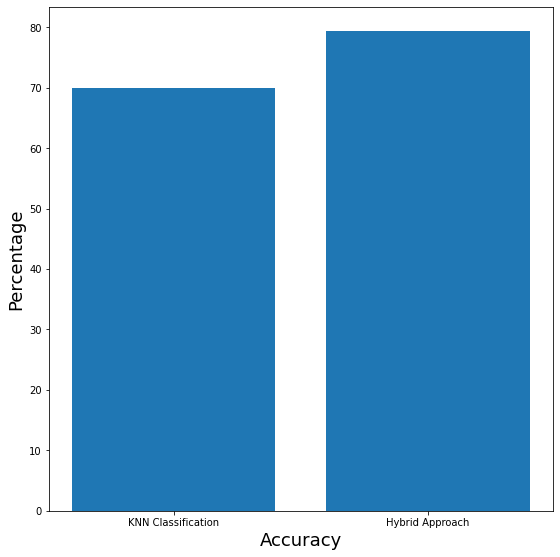

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.ylim([-5, 100])
ax = fig.add_axes([0,0,1,1])
exist_accuracy=70
accuracy = ['KNN Classification','Hybrid Approach']
accuracy_value = [exist_accuracy,pro_accuracy]
ax.bar(accuracy,accuracy_value)
plt.xlabel("Accuracy",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

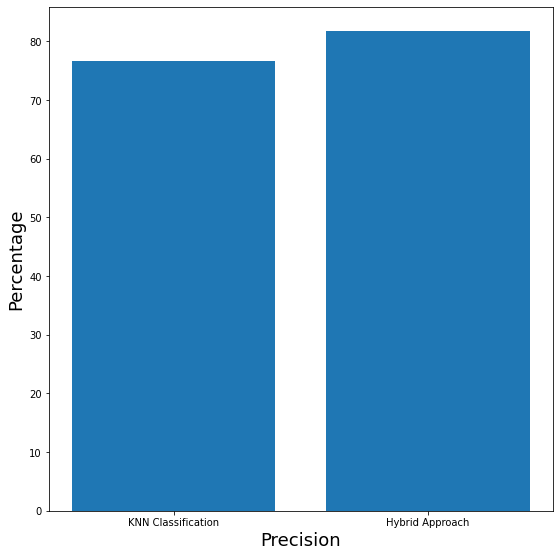

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.ylim([-5, 100])
ax = fig.add_axes([0,0,1,1])
precision = ['KNN Classification','Hybrid Approach']
precision_value = [exist_precision,pro_precision]
ax.bar(precision,precision_value)
plt.xlabel("Precision",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

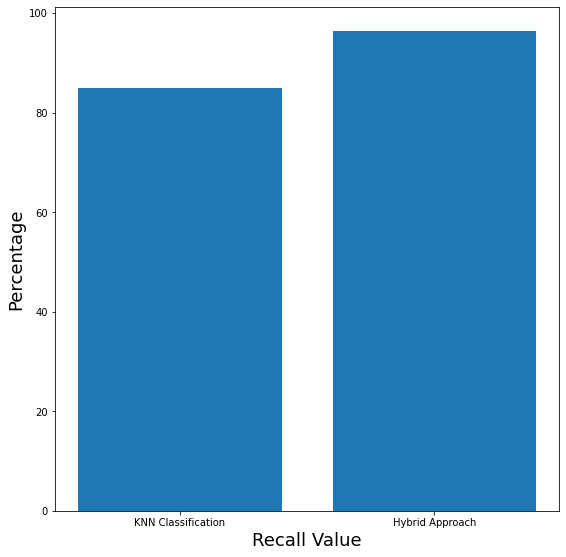

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.ylim([-5, 100])
ax = fig.add_axes([0,0,1,1])
exist_recall=85
recall = ['KNN Classification','Hybrid Approach']
recall_value = [exist_recall,pro_recall]
ax.bar(recall,recall_value)
plt.xlabel("Recall Value",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()

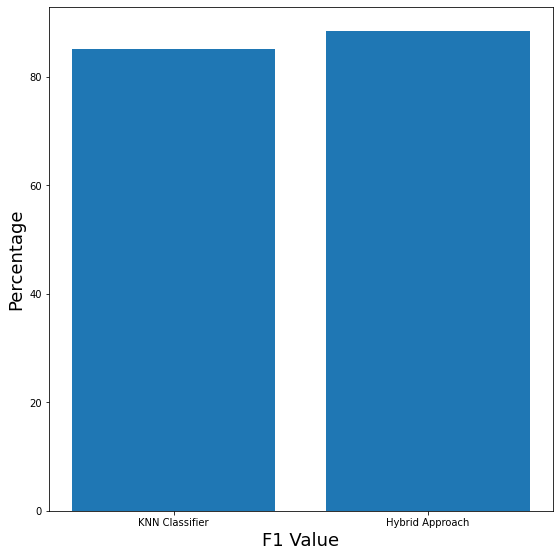

In [ ]:
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.ylim([-5, 100])
ax = fig.add_axes([0,0,1,1])
score = ['KNN Classifier','Hybrid Approach']
score_value = [exist_score,pro_score]
ax.bar(score,score_value)
plt.xlabel("F1 Value",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.show()